# Titanic

In [11]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Method

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

## Model Complexity Validation Curve

In [13]:
def plot_validation_curve(param_range, train_mean_std, test_mean_std, title,
                          logx=False, ax=None, ylim=(0,1.01), xlabel='', ylabel='score'):
    if ax is None:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if ylim is not None:
        ax.set_ylim(*ylim)

    lw = 2
    
    train_scores_mean = train_mean_std[0]
    train_scores_std  = train_mean_std[1]
    test_scores_mean = test_mean_std[0]
    test_scores_std  = test_mean_std[1]

    if (logx):
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw, marker='o')
    else:
        plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw, marker='o')
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)

    if (logx):
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw, marker='o')
    else:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw, marker='o')
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    
    ax.legend(loc="best")
    ax.grid()
    
    return ax#plt

## Learning Curve

In [64]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, 
                        cv=None, scoring='accuracy', n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring=scoring,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")
    axes[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

    return plt

# 1. Preprocessing Data

In [15]:
dataset_dir = '~/Projects/Dataset/titanic'
dataset = pd.read_csv(dataset_dir + '/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
342/(549+342)

0.3838383838383838

In [20]:
dataset.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hawksford, Mr. Walter James",male,1601,B96 B98,S
freq,1,577,7,4,644


## 1.1 Complete data

In [21]:
# Drop 'PassengerId', 'Name' and Ticket' -- don't seem to be particular interesting, 
# Drop 'Cabin' -- too few data, 
dataset = dataset.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)

## 1.2 Fill missing ages

/home/lei/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


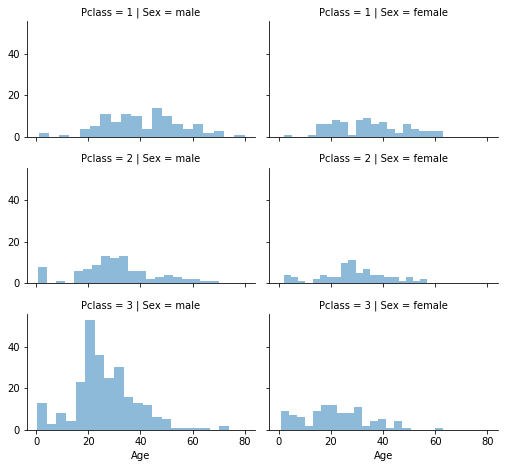

In [22]:
grid = sns.FacetGrid(dataset, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [23]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) 
# to calculate guessed values of Age for the six combinations.
guess_ages = np.zeros((2,3))

for i,sex in enumerate(['male','female']):
    for j in range (0, 3):
        guess_df = dataset[(dataset['Sex'] == sex) & \
                           (dataset['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()
        guess_ages[i, j] = int(age_guess)

for i,sex in enumerate(['male','female']):
    for j in range(0, 3):
        dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == sex) & 
                    (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]

dataset["Age"].isnull().sum()

0

## 1.3 Fill missing embarked

In [24]:
# Series.mode Return the highest frequency value in a Series.
common_port = dataset.Embarked.dropna().mode()[0]
dataset['Embarked'] = dataset['Embarked'].fillna(common_port)
print(common_port)

S


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## 1.4 Convert "Sex"

In [26]:
# Convert sex from text to numerical
dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

## 1.5 Convert "Age" to groups

In [27]:
dataset.loc[ dataset['Age'] <= 12, 'Age'] = 0
dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 24), 'Age'] = 1
dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [28]:
dataset['Age'].value_counts()

2.0    492
1.0    250
0.0     69
3.0     69
4.0     11
Name: Age, dtype: int64

In [29]:
dataset['Age'] = dataset['Age'].astype(int)

## 1.6 Convert "Fare" to groups

In [30]:
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
dataset['Fare'] = dataset['Fare'].astype(int)

## 1.7 Convert "Embarked" to groups

In [31]:
dataset[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [32]:
dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [33]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,2,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


## 1.8 Split data to train and test

In [34]:
from sklearn.model_selection import train_test_split

column_names = dataset.columns
y = dataset['Survived'].copy().values
X = dataset.drop(['Survived'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [35]:
dataset.shape, X_train.shape, X_test.shape

((891, 8), (801, 7), (90, 7))

# 2. Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Dummy estimators 
https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators


In [37]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.5666666666666667

## 2.1 Decision trees with some form of pruning

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

### 2.1.1 Learning curve of default decision tree

In [38]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

acc_tree = round(dt_clf.score(X_train, y_train) * 100, 2)
scores_tree = cross_val_score(dt_clf, X_train, y_train, scoring='accuracy',cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_tree, scores_tree.mean()*100))

acc: 89.39%, cv score: 82.39%


In [39]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [40]:
dt_clf.get_depth(), dt_clf.get_n_leaves()

(15, 135)

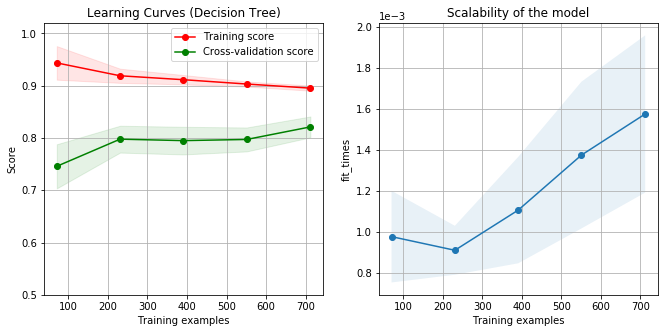

In [68]:
## plot learning curve
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (Decision Tree)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(dt_clf, title, X, y, axes=axes[:2], ylim=(0.5, 1.02),
                    cv=cv, n_jobs=4)

plt.show()

In [69]:
from sklearn.tree import plot_tree
# plot_tree(dt_clf.fit(X_train, y_train)) 


### 2.1.2 Model complexity with pre-pruning `max_depth`

In [70]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

param_range = np.arange(1, 16)
train_scores, test_scores = validation_curve(
    dt_clf, X_train, y_train, param_name="max_depth", param_range=param_range,
    cv=cv, scoring="accuracy", n_jobs=2)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

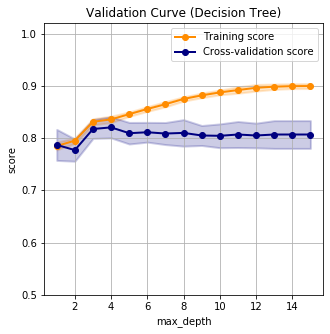

In [71]:
## plot validation curve with max_depth
xlabel=r"max_depth"
title="Validation Curve (Decision Tree)"
ax = plot_validation_curve(param_range, train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.1.3 Model complexity with post-pruning `ccp_alphas`

In [72]:
dt_clf = DecisionTreeClassifier(random_state=0)
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

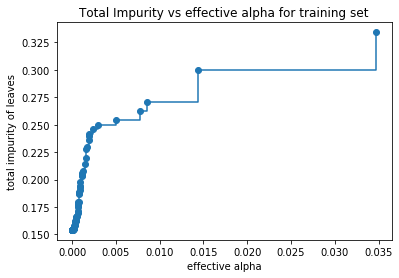

In [73]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [74]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
del clf

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13606503579387486


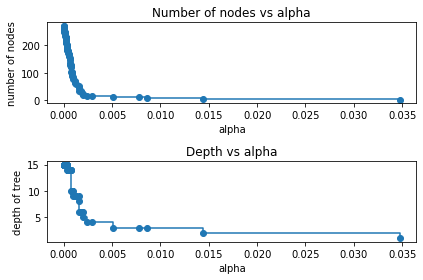

In [75]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

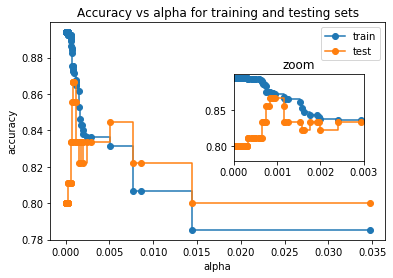

In [76]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
# ax.set_xlim([0., 0.005])
ax.legend()

ax2 = plt.axes([0.55, 0.4, .3, .3])
ax2.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax2.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax2.set_title('zoom')
ax2.set_xlim([0.,0.003])

plt.show()

In [77]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

param_range = np.arange(0, 0.01, 0.001)
train_scores, test_scores = validation_curve(
    dt_clf, X_train, y_train, param_name="ccp_alpha", param_range=param_range,
    cv=cv, scoring="accuracy", n_jobs=2)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

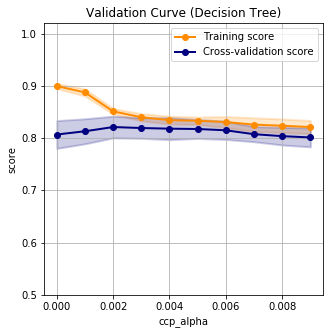

In [78]:
## plot validation curve with max_depth
xlabel=r"ccp_alpha"
title="Validation Curve (Decision Tree)"
ax = plot_validation_curve(param_range, train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.1.4 Final result

In [97]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=10, ccp_alpha=0.005)

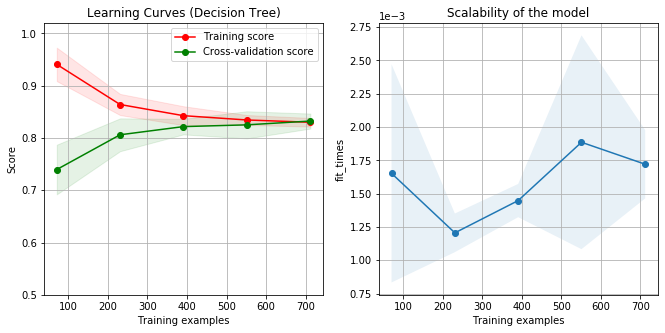

In [98]:
## plot learning curve
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (Decision Tree)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(dt_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, n_jobs=-1)

plt.show()

In [99]:
# dt_clf = DecisionTreeClassifier(random_state=0, max_depth=10, ccp_alpha=0.005)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
acc_decision_tree = round(dt_clf.score(X_train, y_train) * 100, 2)
print('acc: %.2f, depth: %d'%(acc_decision_tree, dt_clf.get_depth()))

acc: 83.65, depth: 4


In [100]:
y_pred = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)  # Accuracy Score
cm_dt = confusion_matrix(y_test, y_pred)  # Confusion Matrix

print('acc: %.2f%%'%(acc_dt*100))
print(str(cm_dt))

acc: 83.33%
[[50  1]
 [14 25]]


## 2.2 Neural networks
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### 2.2.1 Learning curve of default neural networks

In [84]:
nn_clf = MLPClassifier(random_state=0)
nn_clf.fit(X_train, y_train)  # Fit data

acc_nn = round(nn_clf.score(X_train, y_train) * 100, 2)
scores_nn = cross_val_score(nn_clf, X_train, y_train, scoring='accuracy',cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_nn, scores_nn.mean()*100))

/home/lei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/lei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

acc: 79.15%, cv score: 81.40%


/home/lei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


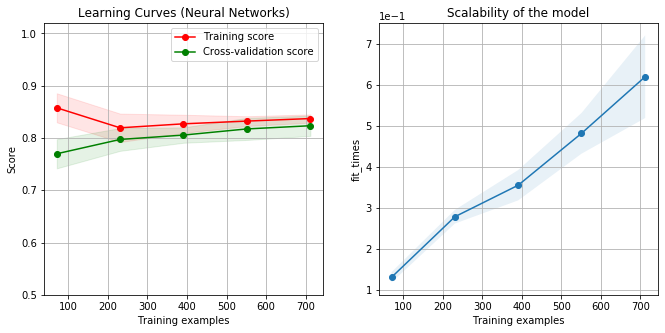

In [85]:
## plot learning curve
nn_clf = MLPClassifier(random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (Neural Networks)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(nn_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, n_jobs=-1)

plt.show()

### 2.2.2 Searching hyper parameters with gridsearchcv

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

In [78]:
print('input layer: ', X_train.shape[1])

input layer:  7


In [81]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
parameters = {'solver': ['lbfgs','adam'], 
              'max_iter': [200, 1000, 2000], 
              'alpha': [0.001, 0.01, 1, 10],
              'learning_rate_init': [0.001, 0.01],
              'hidden_layer_sizes': [(6,), (7,), (10,), (15,)],
              'random_state': [0]
             }
clf = GridSearchCV(MLPClassifier(random_state=0), parameters, cv=cv, n_jobs=-1)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.best_params_)

0.8589263420724095
{'alpha': 1, 'hidden_layer_sizes': (15,), 'learning_rate_init': 0.001, 'max_iter': 2000, 'random_state': 0, 'solver': 'lbfgs'}


### 2.2.3 Model complexity with `hidden_layer_sizes`

In [111]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

nn_clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1, 
                       max_iter=2000, learning_rate_init=0.001,
                       random_state=0)

# param_range = [(6,4), (6,4,3), (15,10), (15,10,5)]
param_range = [(6,), (10,), (15,), (20,), (50,), (100,), (150,), (200,)]
train_scores, test_scores = validation_curve(nn_clf, X_train, y_train, 
            param_name="hidden_layer_sizes", param_range=param_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

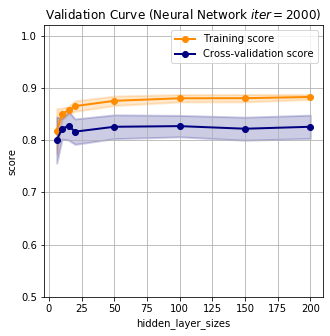

In [112]:
## plot validation curve with hidden_layer_sizes
xlabel = "hidden_layer_sizes"
title  = "Validation Curve (Neural Network $iter=2000$)"

ax = plot_validation_curve([x for (x,) in param_range], train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

In [124]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

nn_clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1, 
                       max_iter=2000, learning_rate_init=0.001,
                       random_state=0)

param_range = [(15,10), (50,25), (50,25,15), (100,50,25), (200,100,50,25)]

train_scores, test_scores = validation_curve(nn_clf, X_train, y_train, 
            param_name="hidden_layer_sizes", param_range=param_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

[Text(0, 0, ''),
 Text(0, 0, '(15,10)'),
 Text(0, 0, ''),
 Text(0, 0, '(50,25)'),
 Text(0, 0, ''),
 Text(0, 0, '(50,25,15)'),
 Text(0, 0, ''),
 Text(0, 0, '(100,50,25)'),
 Text(0, 0, ''),
 Text(0, 0, '(200,100,50,25)')]

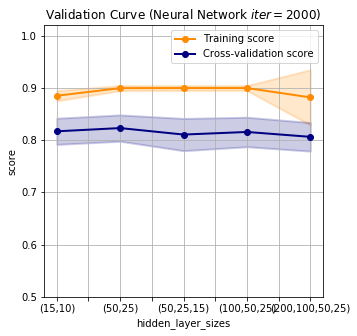

In [130]:
## plot validation curve with hidden_layer_sizes
xlabel = "hidden_layer_sizes"
title  = "Validation Curve (Neural Network $iter=2000$)"

ax = plot_validation_curve(range(len(param_range)), train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

ax.set_xticklabels(['', '(15,10)','','(50,25)','','(50,25,15)','','(100,50,25)','', '(200,100,50,25)'])

### 2.2.4 Final result

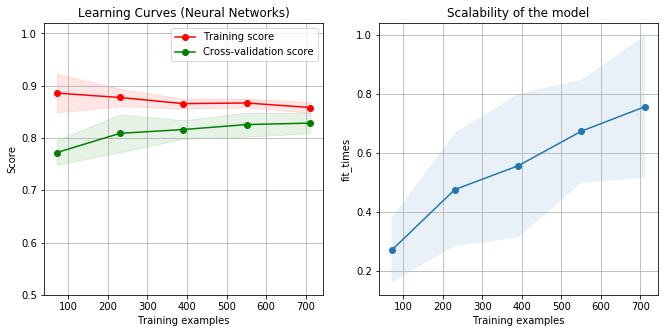

In [132]:
## plot learning curve
nn_clf = MLPClassifier(hidden_layer_sizes=15, random_state=0,
                       activation='relu', solver='lbfgs', alpha=1, 
                       max_iter=2000, learning_rate_init=0.001)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (Neural Networks)"

plot_learning_curve(nn_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, scoring='accuracy', n_jobs=-1)

plt.show()

In [133]:
nn_clf.fit(X_train, y_train)  # Fit data

acc_nn = round(nn_clf.score(X_train, y_train) * 100, 2)
scores_nn = cross_val_score(nn_clf, X_train, y_train, scoring='accuracy',cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_nn, scores_nn.mean()*100))

/home/lei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


acc: 85.89%, cv score: 81.90%


In [134]:

y_pred = nn_clf.predict(X_test)  # Predict results for x_test

acc_nn = accuracy_score(y_test, y_pred)  # Accuracy Score
cm_nn = confusion_matrix(y_test, y_pred)  # Confusion Matrix

print('acc: %.2f%%'%(acc_nn*100))
print(str(cm_nn))

acc: 81.11%
[[46  5]
 [12 27]]


## 2.3 Boosting

https://scikit-learn.org/stable/modules/ensemble.html#adaboost

https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py

### 2.3.1 Learning curve of default AdaBoost

In [87]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0)

boost_clf.fit(X_train, y_train)  # Fit data
acc_boost = round(boost_clf.score(X_train, y_train) * 100, 2)

scores_boost = cross_val_score(boost_clf, X_train, y_train, cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_boost, scores_boost.mean()*100))

acc: 81.15%, cv score: 80.15%


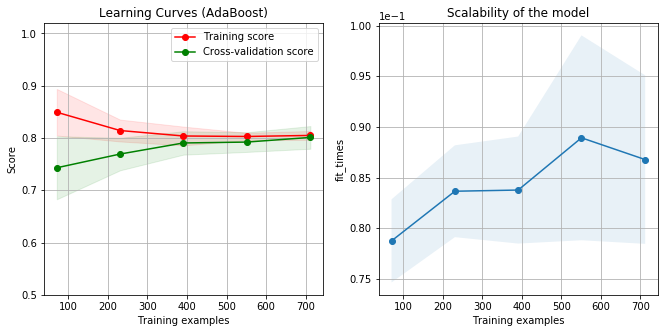

In [88]:
## plot learning curve
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (AdaBoost)"

plot_learning_curve(boost_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, scoring='accuracy', n_jobs=-1)

plt.show()

### 2.3.2 Model complexity with n_estimators and defualt parameters

In [64]:
## pruning with max_depth=1
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1)
## default learning_rate=1.0
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0, learning_rate=1.0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

n_estimators_range = [25, 50, 100, 200, 500, 1000]
train_scores, test_scores = validation_curve(boost_clf, X_train, y_train, 
            param_name="n_estimators", param_range=n_estimators_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

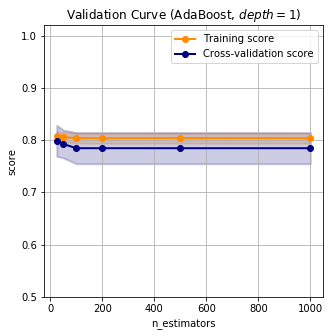

In [65]:
## plot validation curve with max_depth
title  = "Validation Curve (AdaBoost, $depth=1$)"
xlabel = "n_estimators"

ax = plot_validation_curve(n_estimators_range, train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.3.3 Searching hyper parameters with gridsearchcv

In [60]:
## pruning with max_depth=1
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

parameters = {'n_estimators': [25, 50, 100, 200, 500, 1000], 
              'learning_rate': [0.01, 0.1, 1.0, 1.5, 2.0]
             }
clf = GridSearchCV(boost_clf, param_grid=parameters, cv=cv, n_jobs=-1)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.best_params_)

0.8064918851435705
{'learning_rate': 0.1, 'n_estimators': 200}


In [61]:
## pruning with max_depth=2
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=2)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

parameters = {'n_estimators': [25, 50, 100, 200, 500, 1000], 
              'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5, 2.0]
             }
clf = GridSearchCV(boost_clf, param_grid=parameters, cv=cv, n_jobs=-1)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.best_params_)

0.8377028714107366
{'learning_rate': 0.01, 'n_estimators': 500}


### 2.3.4 Model complexity with `n_estimators`

In [62]:
## pruning with max_depth=1
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0, learning_rate=0.1)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

param_range = [25, 50, 100, 200, 500, 1000]
train_scores, test_scores = validation_curve(boost_clf, X_train, y_train, 
            param_name="n_estimators", param_range=param_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

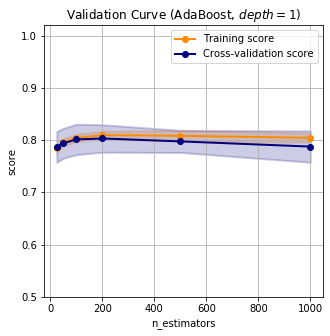

In [63]:
## plot validation curve with max_depth
title  = "Validation Curve (AdaBoost, $depth=1$)"
xlabel = "n_estimators"

ax = plot_validation_curve(param_range, train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

In [66]:
## pruning with max_depth=2
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=2)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0, learning_rate=0.01)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

param_range = [25, 50, 100, 200, 500, 1000]
train_scores, test_scores = validation_curve(boost_clf, X_train, y_train, 
            param_name="n_estimators", param_range=param_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

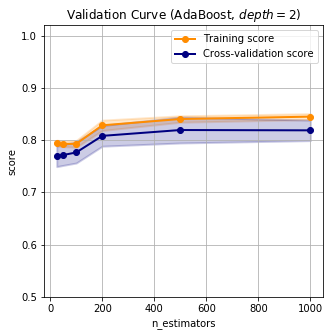

In [67]:
## plot validation curve with max_depth
title  = "Validation Curve (AdaBoost, $depth=2$)"
xlabel = "n_estimators"

ax = plot_validation_curve(param_range, train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.3.5 Model complexity with `learning_rate`

In [68]:
## pruning with max_depth=2
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=2)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0, n_estimators=500)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

param_range = [0.01, 0.1, 1.0, 1.5, 2.0]
train_scores, test_scores = validation_curve(boost_clf, X_train, y_train, 
            param_name="learning_rate", param_range=param_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

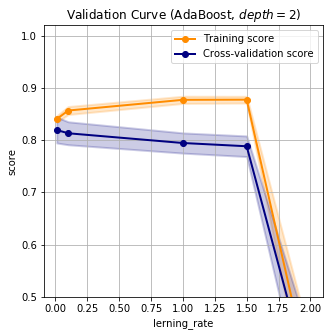

In [69]:
## plot validation curve with max_depth
title  = "Validation Curve (AdaBoost, $depth=2$)"
xlabel = "lerning_rate"

ax = plot_validation_curve(param_range, train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.3.7 Final result

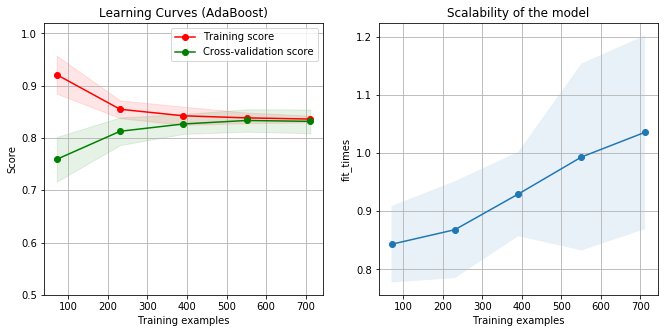

In [135]:
## plot learning curve
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=2)
boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0, 
                               n_estimators=500, learning_rate=0.01)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (AdaBoost)"

plot_learning_curve(boost_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, scoring='accuracy', n_jobs=-1)

plt.show()

In [136]:
# dt_clf = DecisionTreeClassifier(random_state=0, max_depth=2)
# boost_clf = AdaBoostClassifier(base_estimator=dt_clf, random_state=0, 
#                                n_estimators=500, learning_rate=0.01)

boost_clf.fit(X_train, y_train)  # Fit data

acc_boost = round(boost_clf.score(X_train, y_train) * 100, 2)
scores_boost = cross_val_score(boost_clf, X_train, y_train, scoring='accuracy',cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_boost, scores_boost.mean()*100))

acc: 83.77%, cv score: 82.65%


In [137]:
# boost_clf.fit(X_train, y_train)     # Fit data
y_pred = boost_clf.predict(X_test)  # Predict results for x_test

acc_boost = accuracy_score(y_test, y_pred)  # Accuracy Score
cm_boost = confusion_matrix(y_test, y_pred)  # Confusion Matrix

print('acc: %.2f%%'%(acc_boost*100))
print(str(cm_boost))

acc: 83.33%
[[50  1]
 [14 25]]


## 2.4 Support Vector Machines

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r

https://www.youtube.com/watch?v=_PwhiWxHK8o

### 2.4.1 Learning curve of default SVM

In [91]:
svc_clf = SVC(random_state=0)
svc_clf.fit(X_train, y_train)

acc_svc = round(svc_clf.score(X_train, y_train) * 100, 2)

scores_svc = cross_val_score(svc_clf, X_train, y_train, scoring='accuracy',cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_svc, scores_svc.mean()*100))

acc: 82.90%, cv score: 82.53%


In [43]:
svc_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

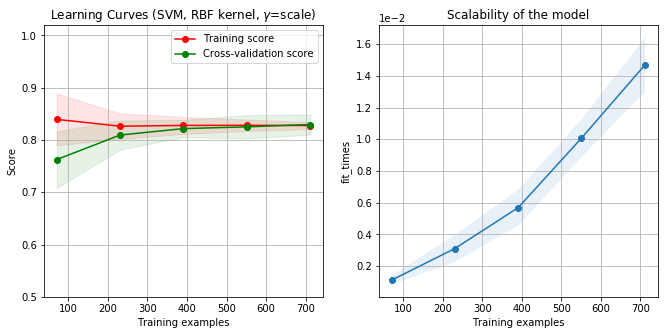

In [92]:
## plot learning curve
svc_clf = SVC(random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (SVM, RBF kernel, $\gamma$=scale)"

plot_learning_curve(svc_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, scoring='accuracy', n_jobs=-1)


plt.show()

### 2.4.2 Searching hyper parameters with gridsearchcv

In [45]:
svc_clf = SVC(random_state=0)

parameters = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']
             }

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

grid = GridSearchCV(svc_clf, param_grid=parameters, cv=cv, n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.score(X_train, y_train))

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

print()
print(grid.best_estimator_) 

0.850187265917603
The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.82

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


### 2.4.3 Model complexity with `C`

In [46]:
svc_clf = SVC(kernel='rbf', gamma=0.1, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# C_range = [0.001, 0.1, 1, 10, 100,1000]
C_range = np.logspace(-3, 3, 10)

train_scores, test_scores = validation_curve(svc_clf, X_train, y_train, 
            param_name="C", param_range=C_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

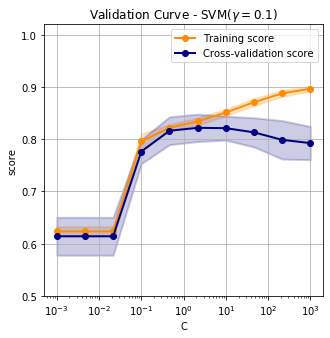

In [47]:
## plot validation curve with max_depth
title  = r"Validation Curve - SVM($\gamma=0.1$)"
xlabel = "C"

ax = plot_validation_curve(C_range, train_mean_std, test_mean_std,
                           title=title, logx=True, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.4.4 Model complexity with `gamma`

In [48]:
svc_clf = SVC(C=1.5, kernel='rbf', random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# gamma_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_range = np.logspace(-3, 3, 10)

train_scores, test_scores = validation_curve(svc_clf, X_train, y_train, 
            param_name="gamma", param_range=gamma_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

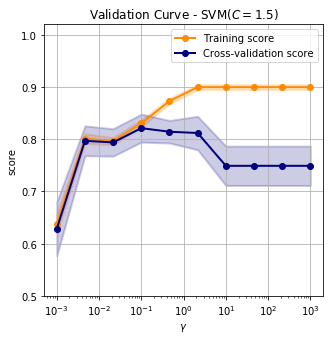

In [49]:
## plot validation curve with max_depth
title  = "Validation Curve - SVM($C={:.1f}$)".format(svc_clf.C)
xlabel = "$\gamma$"

ax = plot_validation_curve(gamma_range, train_mean_std, test_mean_std,
                           title=title, logx=True, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.4.5 Final result

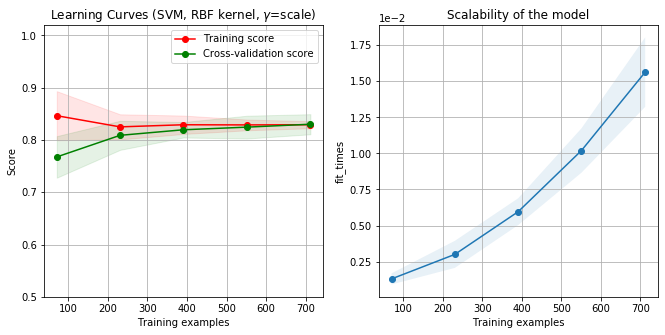

In [158]:
## plot learning curve
svc_clf = SVC(C=1.5, kernel='rbf', gamma=0.1, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (SVM, RBF kernel, $\gamma$=scale)"

plot_learning_curve(svc_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, scoring='accuracy', n_jobs=-1)


plt.show()

In [159]:
# svc_clf = SVC(C=1.5, kernel='rbf', gamma=0.1, random_state=0)
svc_clf.fit(X_train, y_train)

acc_svc = round(svc_clf.score(X_train, y_train) * 100, 2)

scores_svc = cross_val_score(svc_clf, X_train, y_train, scoring='accuracy',cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_svc, scores_svc.mean()*100))

acc: 83.02%, cv score: 82.53%


In [161]:
y_pred = svc_clf.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred)  # Accuracy Score
cm_svc = confusion_matrix(y_test, y_pred)  # Confusion Matrix

print('acc: %.2f%%'%(acc_svc*100))
print(str(cm_svc))

acc: 84.44%
[[47  4]
 [10 29]]


## 2.5 K-Nearest Neighbors

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### 2.5.1 Learning curve of default KNN

In [156]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)


acc_knn = round(knn_clf.score(X_train, y_train) * 100, 2)
scores_knn = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy', cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_knn, scores_knn.mean()*100))

acc: 84.52%, cv score: 80.64%


In [139]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

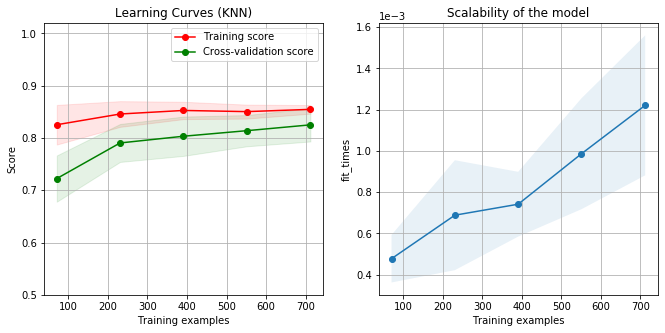

In [142]:
## plot learning curve
knn_clf = KNeighborsClassifier()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (KNN)"

plot_learning_curve(knn_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, scoring='accuracy', n_jobs=-1)


plt.show()

### 2.5.2 Searching hyper parameters with gridsearchcv

In [145]:
knn_clf = KNeighborsClassifier()

parameters = {'n_neighbors': list(range(3,25,2)),
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski'],
              'p': [1, 2, 3, 4, 5],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']
             }

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

grid = GridSearchCV(knn_clf, param_grid=parameters, cv=cv, n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.score(X_train, y_train))

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

print()
print(grid.best_estimator_) 

0.8938826466916354
The best parameters are {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'} with a score of 0.82

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')


### 2.5.3 Model complexity with `n_neighbors`

In [150]:
knn_clf = KNeighborsClassifier(algorithm='ball_tree', weights='distance',
                               metric='minkowski', p=1)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# cv = 5

n_neighbors_range = list(range(1,25))

train_scores, test_scores = validation_curve(knn_clf, X_train, y_train, 
            param_name="n_neighbors", param_range=n_neighbors_range,
            cv=cv, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

train_mean_std = [train_scores_mean, train_scores_std]
test_mean_std  = [test_scores_mean, test_scores_std]

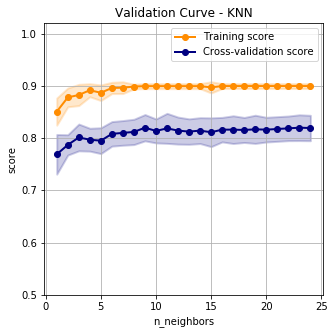

In [151]:
## plot validation curve with max_depth
title  = "Validation Curve - KNN"
xlabel = "n_neighbors"

ax = plot_validation_curve(n_neighbors_range, train_mean_std, test_mean_std,
                           title=title, ylim=(0.5, 1.02), xlabel=xlabel)

### 2.5.4 Final result

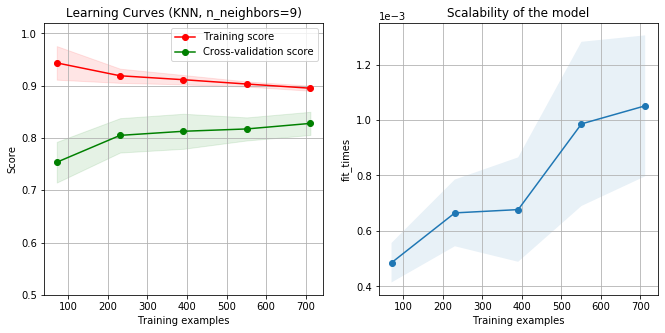

In [153]:
## plot learning curve
knn_clf = KNeighborsClassifier(n_neighbors=9, algorithm='ball_tree', weights='distance',
                               metric='minkowski', p=1)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
title = r"Learning Curves (KNN, n_neighbors=9)"

plot_learning_curve(knn_clf, title, X, y, axes=axes, ylim=(0.5, 1.02),
                    cv=cv, scoring='accuracy', n_jobs=-1)


plt.show()

In [154]:
knn_clf.fit(X_train, y_train)

acc_knn = round(knn_clf.score(X_train, y_train) * 100, 2)
scores_knn = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy',cv=10)

print('acc: {:.2f}%, cv score: {:.2f}%'.format(acc_knn, scores_knn.mean()*100))

acc: 89.39%, cv score: 82.89%


In [157]:
y_pred = knn_clf.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)  # Accuracy Score
cm_dt = confusion_matrix(y_test, y_pred)  # Confusion Matrix

print('acc: %.2f%%'%(acc_knn*100))
print(str(cm_dt))

acc: 83.33%
[[46  5]
 [10 29]]


# 3. Model Comparision

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [165]:
models = pd.DataFrame({
    'Model': ['Decision Tree', ' Neural networks', 'AdaBoost',
              'Support Vector Machines', 'K-Nearest Neighbors'
              ],
    'Score': [acc_dt, acc_nn, acc_boost, 
              acc_svc, acc_knn]})
pd.options.display.float_format = '{:,.2f}'.format
# models.sort_values(by='Score', ascending=False)
models

,Model,Score
0,Decision Tree,0.83
1,Neural networks,0.81
2,AdaBoost,0.83
3,Support Vector Machines,0.84
4,K-Nearest Neighbors,0.83


You can try comparing using other metrics, if applicable. However, if all the methods perform similarly, there are still other means of comparison, such as time complexity, convergence rates, learning curve profiles, sensitivity to hyper-parameter values, etc

In [ ]:
# grid_predictions = grid.predict(X_test) 
  
# # print classification report 
# print(classification_report(y_test, grid_predictions)) 

In [ ]:
# # normalize data
# train = dataframe.values
# train_min_max_scaler = preprocessing.MinMaxScaler()
# train_scaled = train_min_max_scaler.fit_transform(train)
# dataframe = pandas.DataFrame(train_scaled)

# x_train = dataframe[dataframe.columns[2:8]].values.tolist()
# y_train = dataframe[dataframe.columns[0:1]].values.tolist()

# 4. Reference

[1] (https://www.kaggle.com/startupsci/titanic-data-science-solutions)

[2] https://scikit-learn.org/stable/auto_examples/applications/plot_model_complexity_influence.html#

https://www.ritchieng.com/machinelearning-learning-curve/
https://www.dataquest.io/blog/learning-curves-machine-learning/